In [32]:
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning) #Using this to avoid clustering in outputs
warnings.simplefilter(action='ignore', category=FutureWarning)

In [33]:
import pandas as pd
df = pd.read_csv('dataset.csv', index_col = None)
print(df)

     f1   f2  f3  f4   f5    f6     f7  target
0     6  148  72  35    0  33.6  0.627       1
1     1   85  66  29    0  26.6  0.351       0
2     8  183  64   0    0  23.3  0.672       1
3     1   89  66  23   94  28.1  0.167       0
4     0  137  40  35  168  43.1  2.288       1
..   ..  ...  ..  ..  ...   ...    ...     ...
761   9   89  62   0    0  22.5      e       0
762  10  101  76  48  180     d  0.171       0
763   2  122  70  27    b  36.8   0.34       0
764   c  121  72  23  112  26.2  0.245       0
765   1  126  60   a    0  30.1  0.349       1

[766 rows x 8 columns]


In [34]:
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.dropna()
print(df)

      f1     f2  f3    f4     f5    f6     f7  target
0    6.0  148.0  72  35.0    0.0  33.6  0.627       1
1    1.0   85.0  66  29.0    0.0  26.6  0.351       0
2    8.0  183.0  64   0.0    0.0  23.3  0.672       1
3    1.0   89.0  66  23.0   94.0  28.1  0.167       0
4    0.0  137.0  40  35.0  168.0  43.1  2.288       1
..   ...    ...  ..   ...    ...   ...    ...     ...
755  1.0  128.0  88  39.0  110.0  36.5  1.057       1
756  7.0  137.0  90  41.0    0.0  32.0  0.391       0
757  0.0  123.0  72   0.0    0.0  36.3  0.258       1
758  1.0  106.0  76   0.0    0.0  37.5  0.197       0
759  6.0  190.0  92   0.0    0.0  35.5  0.278       1

[760 rows x 8 columns]


In [35]:
statistics = df.describe()
print(statistics)
correlation_matrix = df.corr()
print(correlation_matrix)

               f1          f2          f3          f4          f5          f6  \
count  760.000000  760.000000  760.000000  760.000000  760.000000  760.000000   
mean     3.834211  120.969737   69.119737   20.507895   80.234211   31.998684   
std      3.364762   32.023301   19.446088   15.958029  115.581444    7.899724   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   63.500000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   36.000000   32.000000   
75%      6.000000  141.000000   80.000000   32.000000  128.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

               f7      target  
count  760.000000  760.000000  
mean     0.473250    0.350000  
std      0.332277    0.477284  
min      0.078000    0.000000  
25%      0.243750    0.000000  
50%      0.375500    0.000000  
75%      0.627500    1.000000  
max      2.420

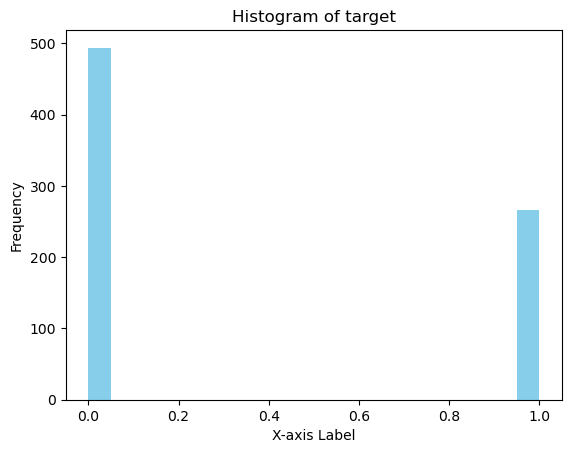

In [36]:
import numpy as np
import matplotlib.pyplot as plt

df['target'].plot(kind='hist', bins=20, color='skyblue')
plt.title('Histogram of target')
plt.xlabel('X-axis Label')
plt.ylabel('Frequency')
plt.show()

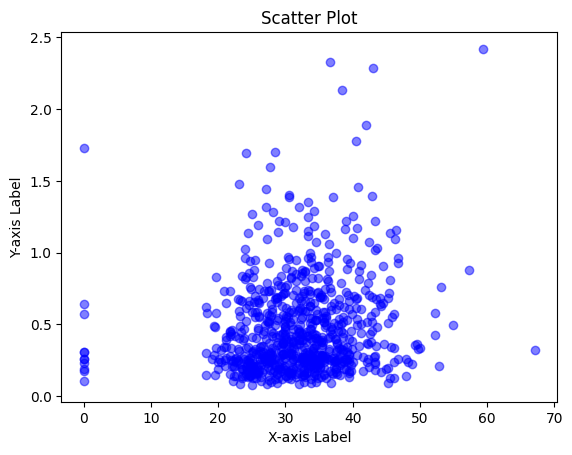

In [568]:
x = df['f6']
y = df['f7']

plt.scatter(x, y, c='blue', alpha=0.5)
plt.title('Scatter Plot')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.show()

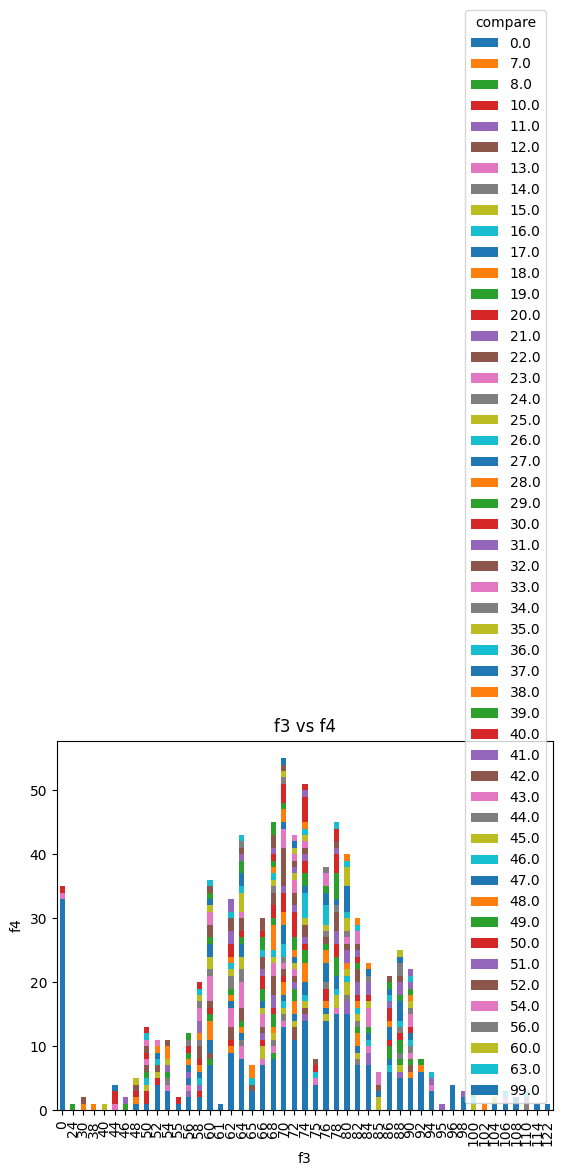

In [569]:
df.groupby(['f3', 'f4']).size().unstack().plot(kind='bar', stacked=True)
plt.title('f3 vs f4')
plt.xlabel('f3')
plt.ylabel('f4')
plt.legend(title='compare')
plt.show()

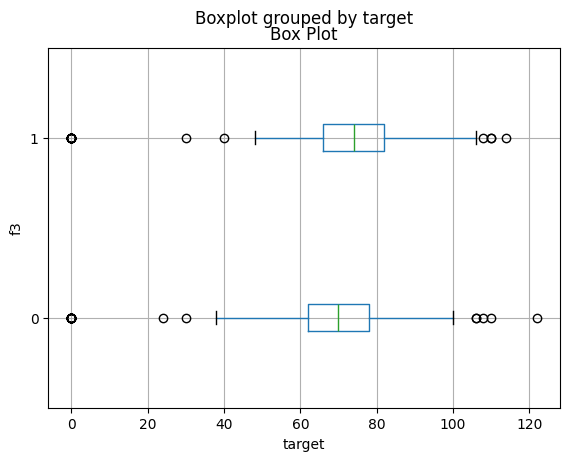

In [570]:
df.boxplot(column='f3', by='target', vert=False)
plt.xlabel('target')
plt.ylabel('f3')
plt.title('Box Plot')
plt.show()

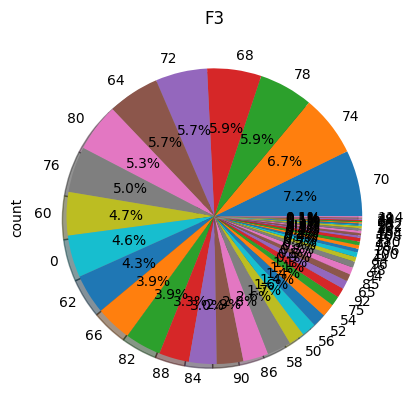

In [571]:
df['f3'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True)
plt.title('F3')
plt.show()

In [572]:
df = df.apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)
print(pd.isnull(df).sum())
df.to_csv('encoded_dataset.csv', index=False)

f1        0
f2        0
f3        0
f4        0
f5        0
f6        0
f7        0
target    0
dtype: int64


In [573]:
min_values = df.min()
max_values = df.max()

print("Min Values:")
print(min_values)
print("\nMax Values:")
print(max_values)
normalized_df = (df - min_values) / (max_values - min_values)

print("\nNormalized DataFrame:")
print(normalized_df)

Min Values:
f1        0.000
f2        0.000
f3        0.000
f4        0.000
f5        0.000
f6        0.000
f7        0.078
target    0.000
dtype: float64

Max Values:
f1         17.00
f2        199.00
f3        122.00
f4         99.00
f5        846.00
f6         67.10
f7          2.42
target      1.00
dtype: float64

Normalized DataFrame:
           f1        f2        f3        f4        f5        f6        f7  \
0    0.352941  0.743719  0.590164  0.353535  0.000000  0.500745  0.234415   
1    0.058824  0.427136  0.540984  0.292929  0.000000  0.396423  0.116567   
2    0.470588  0.919598  0.524590  0.000000  0.000000  0.347243  0.253629   
3    0.058824  0.447236  0.540984  0.232323  0.111111  0.418778  0.038002   
4    0.000000  0.688442  0.327869  0.353535  0.198582  0.642325  0.943638   
..        ...       ...       ...       ...       ...       ...       ...   
755  0.058824  0.643216  0.721311  0.393939  0.130024  0.543964  0.418019   
756  0.411765  0.688442  0.737705  0.41414

In [574]:
from sklearn.model_selection import train_test_split
X = normalized_df.drop('target', axis=1)
y = normalized_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train_train, X_val, y_train_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [575]:
print(normalized_df)

           f1        f2        f3        f4        f5        f6        f7  \
0    0.352941  0.743719  0.590164  0.353535  0.000000  0.500745  0.234415   
1    0.058824  0.427136  0.540984  0.292929  0.000000  0.396423  0.116567   
2    0.470588  0.919598  0.524590  0.000000  0.000000  0.347243  0.253629   
3    0.058824  0.447236  0.540984  0.232323  0.111111  0.418778  0.038002   
4    0.000000  0.688442  0.327869  0.353535  0.198582  0.642325  0.943638   
..        ...       ...       ...       ...       ...       ...       ...   
755  0.058824  0.643216  0.721311  0.393939  0.130024  0.543964  0.418019   
756  0.411765  0.688442  0.737705  0.414141  0.000000  0.476900  0.133646   
757  0.000000  0.618090  0.590164  0.000000  0.000000  0.540984  0.076857   
758  0.058824  0.532663  0.622951  0.000000  0.000000  0.558867  0.050811   
759  0.352941  0.954774  0.754098  0.000000  0.000000  0.529061  0.085397   

     target  
0       1.0  
1       0.0  
2       1.0  
3       0.0  
4    

Neural Network Definition

In [576]:
import torch 
import torch.nn as nn

class NeuralNetwork(nn.Module):
    def __init__(self, dropout, hidden_activation, output_activation):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.dropout = nn.Dropout(p=dropout)
        self.hidden_activation = hidden_activation
        self.output_activation = output_activation
        self.hidden_layers = nn.Sequential(nn.Linear(in_features=7, out_features=128),
                                           hidden_activation,
                                           self.dropout,
                                            nn.Linear(in_features=128, out_features=64),
                                            hidden_activation)
        # self.hidden_layers.append(nn.Linear(in_features=64, out_features=32))
        self.output_layer = nn.Linear(64, 1)
        self.output = nn.Sigmoid()

    def forward(self, x):
        x = self.flatten(x)
        # x = self.dropout(x)
        x = self.hidden_layers(x)
        # x = self.dropout(x)
        # x = self.hidden_activation(self.hidden_layers[0](x)) #Added them to the constructor 
        # x = self.hidden_activation(self.hidden_layers[1](x))
        # x = self.hidden_activation(self.hidden_layers[2](x))
        # x = self.hidden_activation(self.hidden_layers[3](x))
        x = self.output_layer(x)
        output = self.output(x)
        return output

model = NeuralNetwork(dropout=0.25, hidden_activation=nn.ReLU(), output_activation=nn.Sigmoid()) 

In [577]:
def accuracy(y_test, Y_predict): 
    correct_pred = 0
    for test_val, pred_val in zip(y_test, Y_predict):
        if(test_val == pred_val):
            correct_pred +=1
    
    return correct_pred/len(y_test)

In [578]:
from torchinfo import summary

summary(model)

Layer (type:depth-idx)                   Param #
NeuralNetwork                            --
├─Flatten: 1-1                           --
├─Dropout: 1-2                           --
├─ReLU: 1-3                              --
├─Sigmoid: 1-4                           --
├─Sequential: 1-5                        --
│    └─Linear: 2-1                       1,024
│    └─ReLU: 2-2                         --
│    └─Dropout: 2-3                      --
│    └─Linear: 2-4                       8,256
│    └─ReLU: 2-5                         --
├─Linear: 1-6                            65
├─Sigmoid: 1-7                           --
Total params: 9,345
Trainable params: 9,345
Non-trainable params: 0

Training and Validation

In [579]:
from sklearn.metrics import accuracy_score
print()
#Defining same model again here as it is easy to run this cell each time so model training won't accumulate
model = NeuralNetwork(dropout=0.25, hidden_activation=nn.ReLU(), output_activation=nn.Sigmoid()) 
#Defining Loss and Optimizers
loss = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0015, weight_decay=0.01)
# optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

x_train_tensor = torch.from_numpy(X_train.to_numpy())
y_train_tensor = torch.from_numpy(y_train.to_numpy())
    
x_val_tensor = torch.from_numpy(X_val.to_numpy())
y_val_tensor = torch.from_numpy(y_val.to_numpy())

training_losses = []
validation_losses = []
test_losses = []

training_accuracies = []
validation_accuracies = []
test_accuracies = []

best_val_accuracy = 0
best_model = None

import time
start_time = time.time()
print("Start Time: ", start_time)
print()


x_test_tensor = torch.from_numpy(X_test.to_numpy(dtype=np.float32))
y_test_tensor = torch.from_numpy(y_test.to_numpy(dtype=np.float32))
for epoch in range(100):
    #Training
    model.train(True)
    train_loss = 0.0
    training_accuracy = 0
    for i in range(0, len(x_train_tensor), 32):
        x = x_train_tensor[i:i+32].to(torch.float32)
        y = y_train_tensor[i:i+32].to(torch.float32)
        predictions = model(x)
        y = y.unsqueeze(1)  
        binary_values = torch.where(predictions > 0.5, torch.ones_like(predictions), torch.zeros_like(predictions))
        training_accuracy += accuracy_score(y.numpy(), binary_values.numpy())
        loss_obj = loss(predictions, y)
        optimizer.zero_grad()
        loss_obj.backward()
        optimizer.step()
        train_loss += loss_obj.item()

    training_losses.append(train_loss / (len(x_train_tensor)/32))
    training_accuracies.append((training_accuracy / (len(x_train_tensor)/32))*100)

    #Evaluation
    validation_loss = 0.0
    model.eval()
    validation_accuracy = 0
    with torch.no_grad():
        for i in range(0, len(x_val_tensor), 32):
            x = x_val_tensor[i:i+32].to(torch.float32)
            targets = y_val_tensor[i:i+32].to(torch.float32)
            predictions = model(x)
            targets = targets.unsqueeze(1)
            binary_values = torch.where(predictions > 0.5, torch.ones_like(predictions), torch.zeros_like(predictions))
            validation_accuracy += accuracy_score(targets.numpy(), binary_values.numpy())
            loss_obj = loss(predictions, targets)
            validation_loss += loss_obj.item()
    validation_accuracy = (validation_accuracy/( len(x_val_tensor)/32)) * 100
    validation_accuracies.append(validation_accuracy)

    if validation_accuracy > best_val_accuracy:
        best_val_accuracy = validation_accuracy
        best_model = model

    if epoch % 30 == 0:
        print("Epoch", epoch, ": {}".format(validation_accuracy))
    validation_losses.append(validation_loss /( len(x_val_tensor)/32))

    #Testing
    test_loss = 0.0
    test_accuracy = 0
    with torch.no_grad(): #Testing with each epoch to plot the test loss graph
        for i in range(0, len(x_test_tensor), 32):
            x = x_test_tensor[i:i+32].to(torch.float32)
            y = x_test_tensor[i:i+32].to(torch.float32)

            y_test_tensor = y_test_tensor.reshape(-1, )
            predictions = best_model(x_test_tensor)
            y_test_tensor = y_test_tensor.unsqueeze(1)
            binary_values = torch.where(predictions > 0.5, torch.ones_like(predictions), torch.zeros_like(predictions))
            test_accuracy += accuracy_score(y_test_tensor.numpy(), binary_values.numpy())
            loss_obj = loss(predictions, y_test_tensor)
            test_loss += loss_obj.item()
            
    test_losses.append(test_loss /( len(x_test_tensor)/32))
    test_accuracies.append((test_accuracy/( len(x_test_tensor)/32))*100)

print()
end_time = time.time()
print("End Time: ", start_time)
print("Train time: ", end_time - start_time)
print()
print("Best Accuracy: ", "{}".format(best_val_accuracy)) 



Start Time:  1698361553.9383752

Epoch 0 : 70.23959646910467
Epoch 30 : 80.64312736443884
Epoch 60 : 79.8234552332913
Epoch 90 : 78.18411097099623

End Time:  1698361553.9383752
Train time:  4.6011130809783936

Best Accuracy:  83.10214375788146


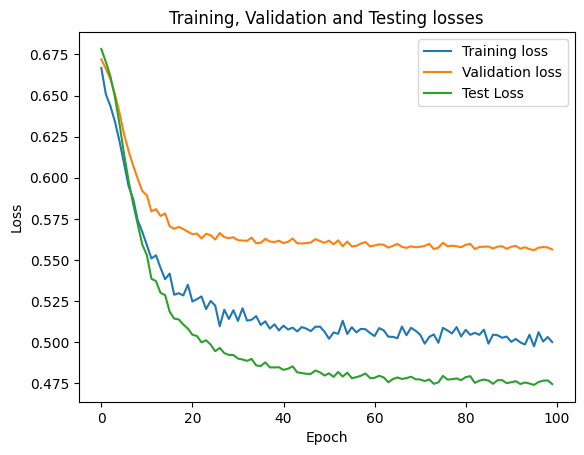

In [580]:
plt.plot(training_losses, label='Training loss')
plt.plot(validation_losses, label='Validation loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Training, Validation and Testing losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

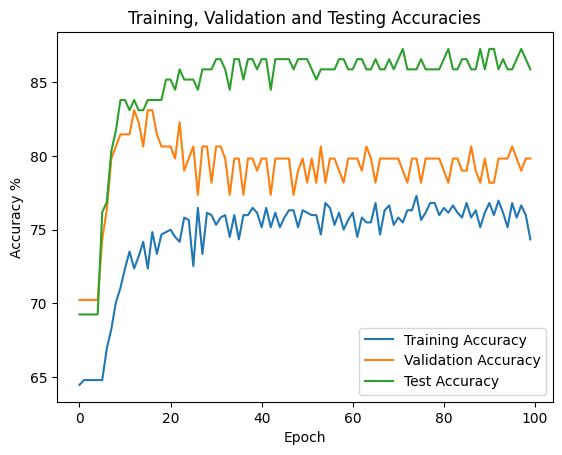

In [581]:
plt.plot(training_accuracies, label='Training Accuracy')
plt.plot(validation_accuracies, label='Validation Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.title('Training, Validation and Testing Accuracies')
plt.xlabel('Epoch')
plt.ylabel('Accuracy %')
plt.legend()
plt.show()

In [582]:
np.sum(np.array(test_losses) - np.array(validation_losses))

-6.862111541399985

Testing

In [583]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, f1_score

test_loss = 0
test_predictions = []

x_test_tensor = torch.from_numpy(X_test.to_numpy(dtype=np.float32))
y_test_tensor = torch.from_numpy(y_test.to_numpy(dtype=np.float32))
# print(x_test_tensor.shape, y_test_tensor.shape)
with torch.no_grad():
    for i in range(0, len(x_test_tensor), 32):
        x = x_test_tensor[i:i+32].to(torch.float32)
        y = x_test_tensor[i:i+32].to(torch.float32)
        y_test_tensor = y_test_tensor.reshape(-1, )
        predictions = best_model(x_test_tensor)

        y_test_tensor = y_test_tensor.unsqueeze(1)

# print(len(test_predictions))
prediction_labels = [1 if pred > 0.5 else 0 for pred in predictions]
accuracy_test = accuracy_score(y_test_tensor.numpy(), [1 if pred > 0.5 else 0 for pred in predictions])
precision, recall, fscore, support = precision_recall_fscore_support(y_test_tensor.numpy(), np.array(prediction_labels), average="binary")
print("Accuracy: ", accuracy_test, "\nPrecision: ", precision, "\nRecall: ", recall, "\nF1 score: ", fscore, "\nSupport", support)

Accuracy:  0.8157894736842105 
Precision:  0.7727272727272727 
Recall:  0.6538461538461539 
F1 score:  0.7083333333333333 
Support None


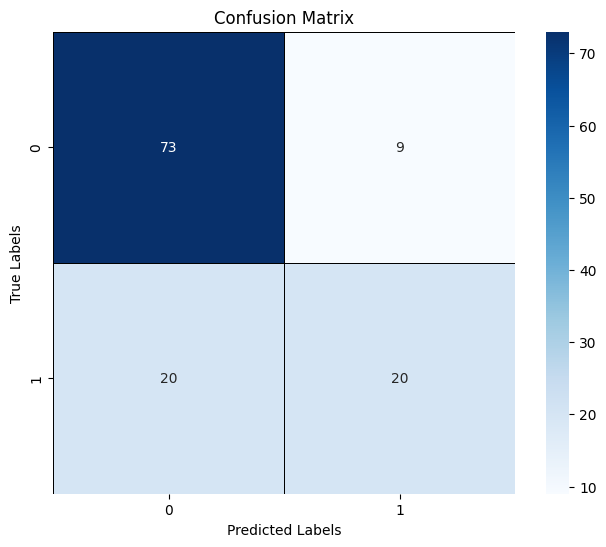

In [584]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
model.eval()
with torch.no_grad():
    predictions = best_model(x_val_tensor.to(torch.float32))
    predictions = torch.where(predictions > 0.5, 1, 0) 

cm = confusion_matrix(y_val_tensor, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5, linecolor="black", square=True)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


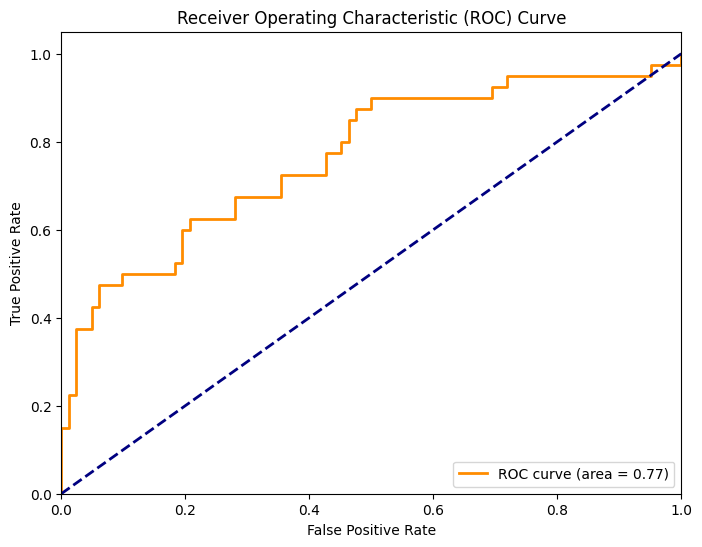

In [585]:
from sklearn.metrics import roc_curve, roc_auc_score
true_labels = y_val_tensor.numpy()
x_val_tensor = x_val_tensor.to(torch.float32)
predicted_probs = best_model(x_val_tensor).detach().numpy()
fpr, tpr, thresholds = roc_curve(true_labels, predicted_probs)
roc_auc = roc_auc_score(true_labels, predicted_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [586]:
torch.save(model.state_dict(), 'model_weights.pth')

References

In [587]:
#https://pytorch.org/tutorials/beginner/introyt/trainingyt.html
#https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html
#https://pytorch.org/docs/stable/optim.html